In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

# Where to save the figures
PROJECT_ROOT_DIR = "."
CATEGORY_DIR = "images"
SUB_DIR = "fashionClass"

SAVE_IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, CATEGORY_DIR, SUB_DIR)
os.makedirs(SAVE_IMAGE_PATH, exist_ok=True)

def save_image(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    filename = os.path.join(SAVE_IMAGE_PATH, fig_name + "." + fig_extension)
    print("Saving file : ", filename)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(filename, format=fig_extension, dpi=resolution)

In [2]:
# Check Tensorflow version
tf.__version__

'1.14.0'

In [3]:
# Check version of Keras API implemented by tf.keras
keras.__version__

'2.2.4-tf'

### Download Fashion_MNIST dataset from Keras and stored in ~/.keras/datasets

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(str(X_train_full.shape) + " with types : " + str(X_train_full.dtype))

(60000, 28, 28) with types : uint8


In [6]:
print(str(X_test.shape) + " with types : " + str(X_test.dtype))

(10000, 28, 28) with types : uint8


- Full training dataset is split into a training set (60000 images) and a test set (10000 images)
- Training set is split into a new training set (55000 images) and a validation set (5000 images)
- Scale the pixel intensities down to the 0–1 range for Gradient Descent having them divided by 255.0 (this also converts them to floats)

In [7]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [8]:
# The validation set contains 5,000 images, and the test set contains 10,000 images
X_train.shape, X_val.shape

((55000, 28, 28), (5000, 28, 28))

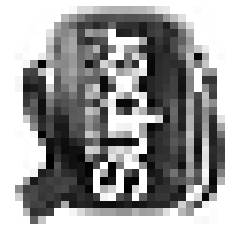

In [9]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.imshow(X_train[12], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
# The labels are the class IDs (represented as uint8), from 0 to 9:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
# The corresponding class names:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[12]]

'Bag'

Saving file :  ./images/fashionClass/fashion_mnist_plot_30.png


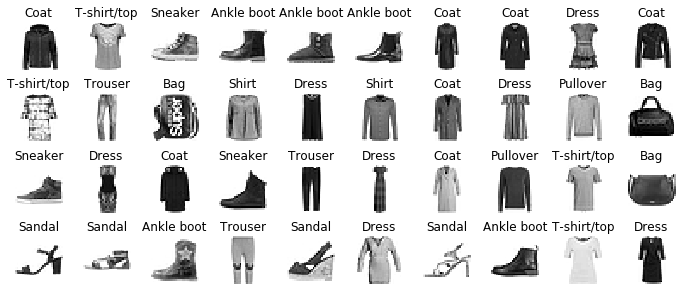

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_image('fashion_mnist_plot_30', tight_layout=False)
plt.show()

In [14]:
keras.backend.clear_session()
np.random.seed(42)

#tf.random.set_seed(42) for tensorflow >= 2.0

# Create a classification MLP with two hidden layers:

In [35]:
# Ignore deprecation warning 
import warnings
warnings.filterwarnings(action="ignore", message="^internal errors")

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", name='layer1'),
    keras.layers.Dense(100, activation="relu", name='layer2'),
    keras.layers.Dense(10, activation="softmax", name='output')
])

In [16]:
model.layers

- First hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 300)               235500    
_________________________________________________________________
layer2 (Dense)               (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fetch a layer by its index, or you can fetch it by name
hidden_layer1 = model.layers[1]
hidden_layer1.name

'layer1'

In [19]:
# Compared the layer to make sure it is the same address
model.get_layer(hidden_layer1.name) is hidden_layer1

True

In [20]:
weights, biases = hidden_layer1.get_weights()

In [21]:
print("Hidden Layer 1 weights : \n", weights)
print("Hidden Layer 1 biases : \n", biases)

Hidden Layer 1 weights : 
 [[ 0.00812784  0.03243223  0.02310459 ... -0.0678731  -0.02900318
  -0.04801646]
 [-0.02691221 -0.03603471 -0.02430029 ...  0.06412929  0.04019342
   0.05680639]
 [ 0.07080635 -0.00244747  0.03834197 ...  0.03172342  0.03161769
  -0.05697243]
 ...
 [ 0.06677046 -0.06319863 -0.01685699 ...  0.06915537  0.03605254
  -0.06584169]
 [-0.06471159  0.00775002 -0.04009794 ... -0.06359514  0.05388083
  -0.06636705]
 [ 0.05950283  0.06639765  0.05728103 ... -0.01542915 -0.03385126
   0.04384641]]
Hidden Layer 1 biases : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

In [22]:
print("Weights shape :", weights.shape)
print("Biases shape :", biases.shape)

Weights shape : (784, 300)
Biases shape : (300,)


- Compile the Neural Network model
- The model has sparse labels (i.e., Each instance has only a target class index, from 0 to 9), and the classes are mututally exclusive.

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
NN_model = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.7172 - acc: 0.7646 - val_loss: 0.4999 - val_acc: 0.8336
Epoch 2/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4861 - acc: 0.8290 - val_loss: 0.4538 - val_acc: 0.8456
Epoch 3/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4423 - acc: 0.8449 - val_loss: 0.4096 - val_acc: 0.8586
Epoch 4/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4158 - acc: 0.8523 - val_loss: 0.4032 - val_acc: 0.8630
Epoch 5/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.3961 - acc: 0.8603 - val_loss: 0.3793 - val_acc: 0.8694
Epoch 6/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3807 - acc: 0.8653 - val_loss: 0.3778 - val_acc: 0.8684
Epoch 7/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3666 - acc: 0.8694 - val_loss: 0.3

In [25]:
NN_model.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [26]:
# Getting the params and dictionary keys of the model
# print(NN_model.epoch)
NN_model.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Saving file :  ./images/fashionClass/Keras_NNLearning_Curves_plot.png


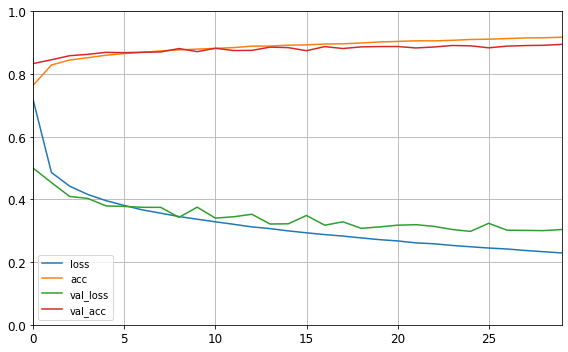

In [27]:
pd.DataFrame(NN_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

save_image("Keras_NNLearning_Curves_plot")
plt.show()

- Evaluate the model

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3385 - acc: 0.8810


[0.3385363259553909, 0.881]

- Predict with the model

In [29]:
# Get 7 samples from X_test for predictions since we do not have new images
X_samples = X_test[:7]
y_probability = model.predict(X_samples)
y_probability.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.21, 0.  , 0.01, 0.  , 0.01, 0.  , 0.78, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_predictions = model.predict_classes(X_samples)
y_predictions

array([9, 2, 1, 1, 6, 1, 4])

In [31]:
# Get the equivalent class names
np.array(class_names)[y_predictions]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat'], dtype='<U11')

- The ground truth of the test sets

In [32]:
y_samples = y_test[:7]
y_samples

array([9, 2, 1, 1, 6, 1, 4], dtype=uint8)

In [33]:
X_samples.shape

(7, 28, 28)

Saving file :  ./images/fashionClass/fashion_mnist_images_plot.png


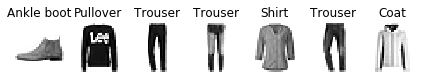

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_samples):
    plt.subplot(1, X_samples.shape[0], index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_image('fashion_mnist_images_plot', tight_layout=False)
plt.show()

#End of Code